In [1]:
import pandas as pd

df = pd.read_csv("/content/heart_cleveland_upload.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


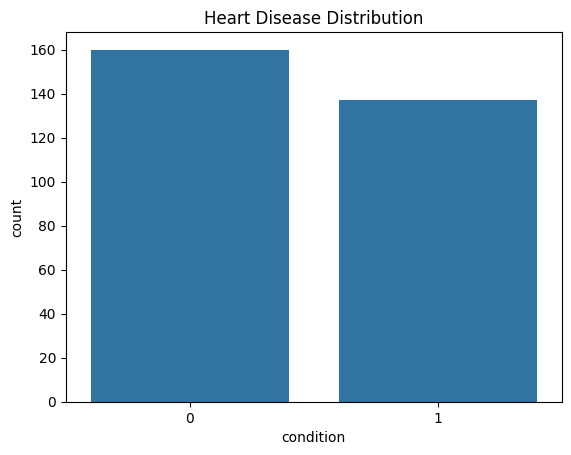

,proportion
condition,
0,0.538721
1,0.461279


In [13]:
sns.countplot(x='condition', data=df)
plt.title("Heart Disease Distribution")
plt.show()

df['condition'].value_counts(normalize=True)

In [3]:
df['condition'].value_counts()
df['condition'].value_counts(normalize=True)


,proportion
condition,
0,0.538721
1,0.461279


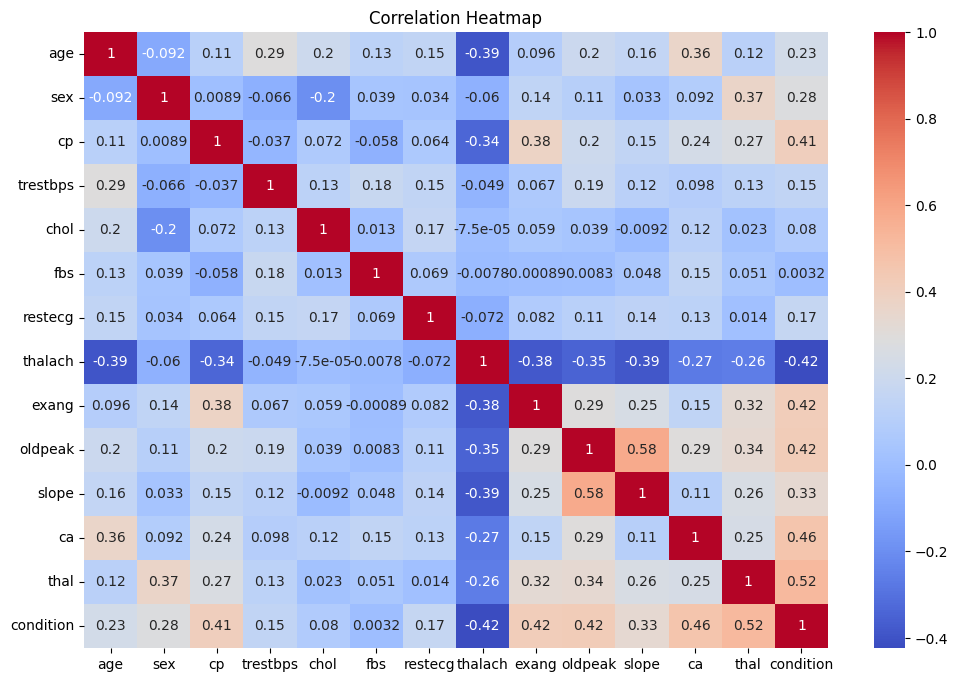

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
X = df.drop("condition", axis=1)
y = df["condition"]


In [7]:
X = pd.get_dummies(X, drop_first=True)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [14]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



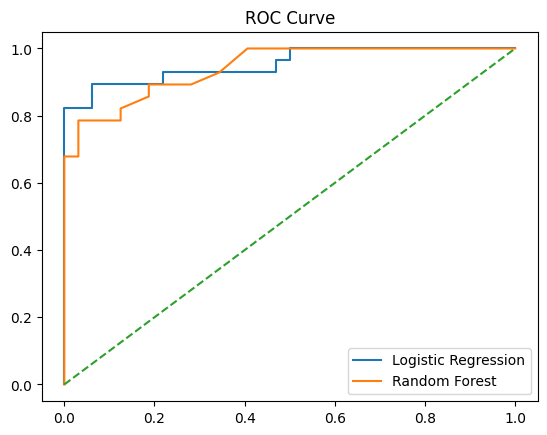

In [15]:
y_prob_lr = lr.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.legend()
plt.title("ROC Curve")
plt.show()


In [16]:
import numpy as np

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lr.coef_[0]
}).sort_values(by="Importance", ascending=False)

coefficients.head(10)


,Feature,Importance
11,ca,1.012992
12,thal,0.577100
2,cp,0.473178
8,exang,0.446504
9,oldpeak,0.406621
1,sex,0.385400
3,trestbps,0.305206
10,slope,0.247405
4,chol,0.160574
6,restecg,0.131546


In [17]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances.head(10)


,Feature,Importance
7,thalach,0.158690
2,cp,0.123382
9,oldpeak,0.115131
11,ca,0.109056
0,age,0.095799
12,thal,0.091850
4,chol,0.080161
3,trestbps,0.078338
8,exang,0.051173
10,slope,0.040976


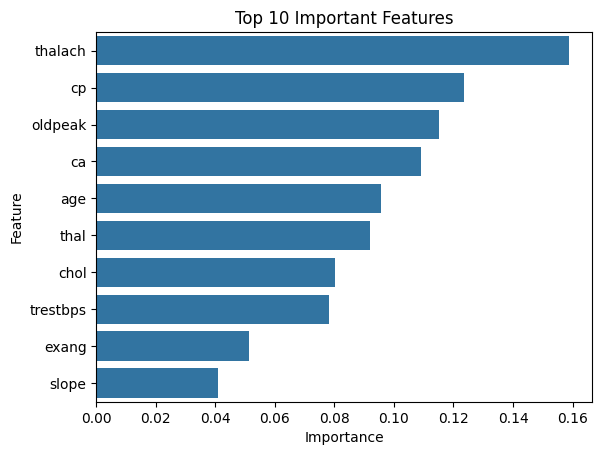

In [18]:
sns.barplot(x="Importance", y="Feature", data=importances.head(10))
plt.title("Important Features")
plt.show()


In [20]:
import joblib

joblib.dump(rf, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "columns.pkl")


['columns.pkl']